# Day 08. Exercise 04
# Regression

## 0. Imports

In [1]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

## 1. Preprocessing

1. Read the file [`checker_regression.csv`](https://drive.google.com/file/d/1L8auBzJEghWFewznhhFpcrqxW4GqcfRY/view?usp=sharing).
2. Fill the missing values in it with `0`.
3. Make a split of your dataset on train and test with parameters `test_size=0.2`.

In [2]:
df = pd.read_csv("../data/checker_regression.csv")
df.fillna(0, inplace=True)
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 0 to 76
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   uid          29 non-null     object 
 1   num_commits  29 non-null     int64  
 2   pageviews    29 non-null     float64
 3   AVG(diff)    29 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.1+ KB


In [3]:
x = df[["num_commits", "pageviews"]]
y = df["AVG(diff)"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=21)

## 2. Crossvalidation

1. Write a function `crossval` that takes as arguments: `n_splits` for `KFold()`, `X`, `y`, model instantiated class with the parameters of the model (keep in mind: `random_state=21`) and returns for a given model class a result like this:

```
train -  2696.4496895424836   |   test -  1589.9979527104958
train -  2660.957874001452   |   test -  2075.102636027137
train -  2847.315529246795   |   test -  320.911928168403
train -  2500.7691099659237   |   test -  4132.461382030178
train -  2643.927917295123   |   test -  2237.8140952197878
train -  2396.295678819444   |   test -  4509.650064742476
train -  2003.402267924976   |   test -  8403.491474908551
train -  2531.876094212613   |   test -  3135.944102735099
train -  2683.1795186023123   |   test -  1796.01426292594
train -  2537.1192483996338   |   test -  3439.29824116941
Average RMSE on crossval is 3164.0686140637476
```

2. Run the function for `LinearRegression`, `DecisionTreeRegressor`, `RandomForestRegressor`. You may choose the parameters by yourself, but find the good enough for you.

In [4]:
def crossval(n_splits, x, y, model):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=21)
    rmse = 0

    for train_index, test_index in kf.split(x):
        x_train, x_test = x.iloc[train_index], x.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model.fit(x_train, y_train)
        predicts_train = model.predict(x_train)
        predicts_test = model.predict(x_test)
        rmse_train = mean_squared_error(y_train, predicts_train, squared=False)
        rmse_test = mean_squared_error(y_test, predicts_test, squared=False)
        print(f"train -  {rmse_train}   |   test -  {rmse_test}")
        rmse = rmse + rmse_train + rmse_test

    rmse = rmse / (n_splits * 2)
    print(f"Average RMSE on crossval is {rmse}")
    return model



In [5]:
model_lr = LinearRegression()
model_lr = crossval(10, x_train, y_train, model_lr)

train -  53.33351096491692   |   test -  115.2394318363867
train -  62.409919772255556   |   test -  69.3580879473302
train -  64.75146423244131   |   test -  52.395419621714424
train -  64.04094981627755   |   test -  78.18810821407223
train -  63.574089717062186   |   test -  58.669554693832154
train -  65.40154560181439   |   test -  32.100688546741225
train -  64.40600245557161   |   test -  48.59322878192214
train -  61.21547266380472   |   test -  82.41734194163651
train -  64.69372263304507   |   test -  43.81163345544472
train -  62.80195740062015   |   test -  70.47228900535454
Average RMSE on crossval is 63.89372096511221


In [6]:
model_tree = DecisionTreeRegressor(max_depth=4, random_state=21)
model_tree = crossval(10, x_train, y_train, model_tree)

train -  19.756827933653724   |   test -  63.2101257711136
train -  20.876122724299165   |   test -  82.25810891019488
train -  22.063461184602122   |   test -  11.518137870333035
train -  21.742264634314694   |   test -  8.60313250443633
train -  15.222075077495283   |   test -  80.25661966467314
train -  21.569529200867827   |   test -  15.202795795510772
train -  21.347979223599054   |   test -  40.58792924010783
train -  21.569529200867827   |   test -  37.190388543278225
train -  20.39538654519797   |   test -  30.8121779902038
train -  13.121372766613382   |   test -  69.11968786098502
Average RMSE on crossval is 31.82118263211738


In [7]:
model_forest = RandomForestRegressor(n_estimators=100, max_depth=25, random_state=21)
model_forest = crossval(10, x_train, y_train, model_forest)

train -  19.85306588532919   |   test -  76.53685427174808
train -  22.671373358544045   |   test -  81.61793883314117
train -  21.694829255044976   |   test -  5.71235319286195
train -  22.7272784086383   |   test -  9.177142450433891
train -  24.38477655695876   |   test -  70.14702143355767
train -  19.90791216218836   |   test -  40.07320878716852
train -  20.52570355431141   |   test -  55.68347292110613
train -  22.325869971584417   |   test -  22.92156316416678
train -  18.972031532693418   |   test -  26.447489505149523
train -  16.687043596636038   |   test -  69.28195592288081
Average RMSE on crossval is 33.36744423820717


## 3. Predictions and evaluation

1. Make predictions for the test dataset using each of the three models with the finalized parameters.
2. Draw a plot for each of the models where the `x-axis` is the actual average difference and the `y-axis` is the prediction made by a model.
3. How would plot look like in the ideal case? Put the answer to the markdown cell in the end of the section.

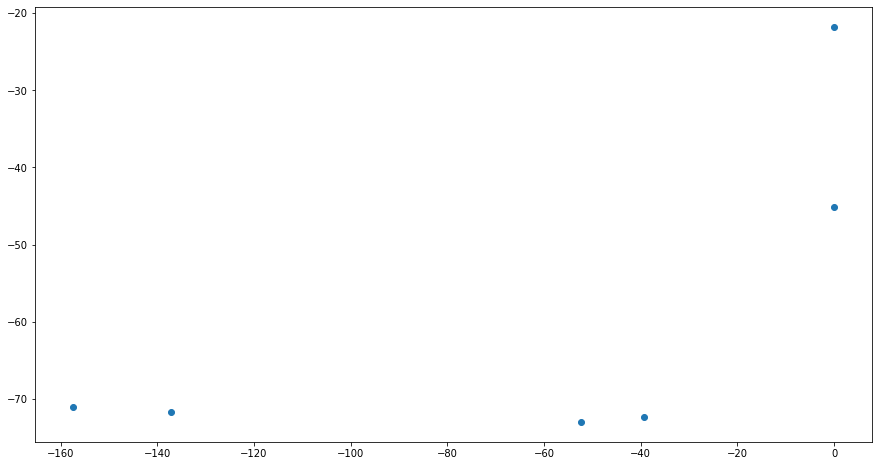

In [8]:
predict_lr = model_lr.predict(x_test)
plt.figure(figsize=(15,8))
plt.scatter(y_test, predict_lr)
plt.show()

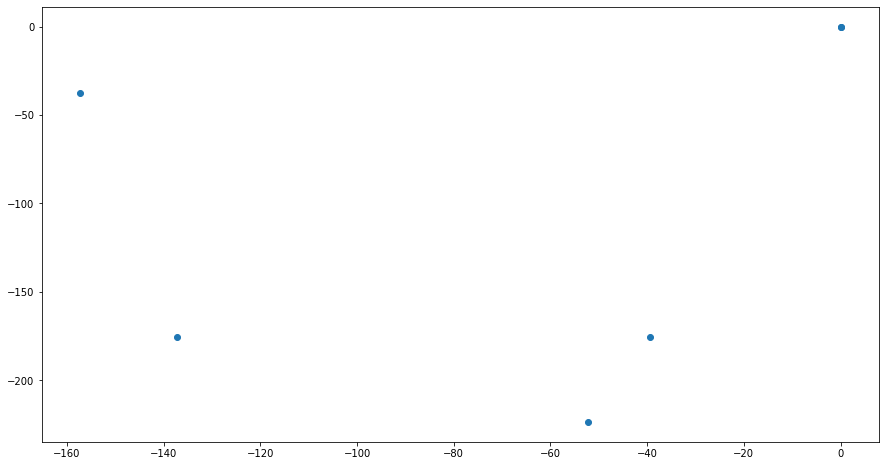

In [9]:
predict_tree = model_tree.predict(x_test)
plt.figure(figsize=(15,8))
plt.scatter(y_test, predict_tree)
plt.show()

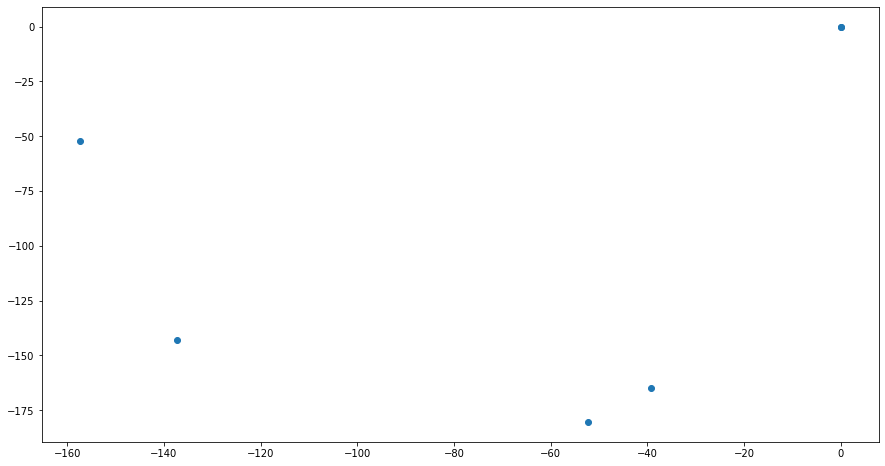

In [10]:
predict_forest = model_forest.predict(x_test)
plt.figure(figsize=(15,8))
plt.scatter(y_test, predict_forest)
plt.show()

The answer: in the ideal case it would be a diagonal 